## Exercise Importance Sampling

## Table of Contents
* [Introduction](#Introduction) 
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules) 
* [Theory](#Theory) 
* [Exercises](#Exercises) 
* [Licenses](#Licenses) 

## Introduction

Importance sampling is a very usefull method to calculate $\mathbb E[f(x)]$ for $x \sim p$, where $f(x)$ lies in a region for which $P(x)$ is very small or where getting samples from $p$ is fairly hard or impossible. In this exercise we will show both cases and how importance sampling helps to solve these problems.

## Requirements

### Knowledge

To complete this exercise notebook, you should possess knowledge about the following topics.
* Monte Carlo estimator 
* Importance sampling

The following material can help you to acquire this knowledge:
* https://www.youtube.com/watch?v=S3LAOZxGcnk 
* Chaper 2 of http://www.inference.org.uk/mackay/erice.pdf

## Theory

Given a function $f(x)$ and probability distribution $p(x)$ we calculate the expectation value as follows

\begin{equation}
\mathbb E[f(x)] = \int_{x \sim p} f(x)p(x)dx. 
\end{equation}

Now we add a helping probability distribution $q(x)$ and arrive at

\begin{equation}
\mathbb E[f(x)] = \int_{x \sim q} \frac{f(x)p(x)}{q(x)} q(x) dx .
\end{equation}

Using Monte Carlo estimation we get our desired expection value for $f(x)$ with $x \sim q$ over discrete values

\begin{equation}
\mathbb E[f(x)] = \sum_{i=1}^n f(x_i) \frac{p(x_i)}{q(x_i)}. 
\end{equation}

 $\frac{p(x_i)}{q(x_i)}$ can be interpreted as *importance weights*.

### Python Modules

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
np.random.seed(42)
%matplotlib inline

## Exercises

Given the function $g(x)=-x^2 + 2$ and the probability distribution $p(x)= 0.4\mathcal N (-0.5,0.1) +0.6 \mathcal N(0.2,0.2)$ we want to calculate $E[f(x)]$. The situation looks as follows

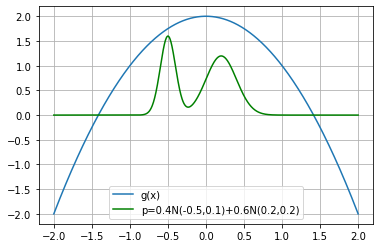

In [13]:
def g(x):
    gy = np.zeros(np.size(x))
    for i in np.arange(np.size(x)):
        if (x[i]<=2) and (x[i]>=-2):
            gy[i] = -x[i]**2+2
    return gy

xx = np.linspace(-2,2,1000)
plt.plot(xx,g(xx),label='g(x)')

#pdf's
mu_1,mu_2,sigma_1,sigma_2,prob_1 = -0.5,0.2,0.1,0.2,0.4  
rv_1 = norm(loc = mu_1, scale = sigma_1)
rv_2 = norm(loc = mu_2, scale = sigma_2)
p_green = lambda x: prob_1 * rv_1.pdf(x) + (1-prob_1) * rv_2.pdf(x)
plt.plot(xx, p_green(xx) , "g-",label='p=0.4N(-0.5,0.1)+0.6N(0.2,0.2)')
plt.legend()
plt.grid()
plt.show()

### Task 2

Find a good approximation $q$ of $p$, plot all three functions and calculate $\mathbb E_{p(x)}[g(x)]$  using importance sampling with your approximation $q$. Compare the solution by direct sampling from $p$ (which can be done here).

Hint: Your results for both cases should be very similar. 

We use a sampler density $q=\mathcal N(0, 0.25)$ and sample $x_i$ from $q$: $x \sim q(x)$.     
Then the samples $x_i$ are weighted by $p(x_i)/q(x_i)$.

In [1]:
# this is importance sampling

# sampler density q

#take samples $x \sim q$
size=100

# We sample from q
samples = np.random.normal(mu_red, sigma_red, size)

importance_weights = p_green(samples)/q_red(samples)

# Function values 
g_ = g(samples)
 
# expectation by weighting:
np.sum(g_*importance_weights)/np.sum(importance_weights)

NameError: name 'np' is not defined

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

HTW Berlin - Angewandte Informatik, exercise-sampling-importance-new <br/>
by Christian Herta, Oliver Fischer <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2019 Christian Herta, Oliver Fischer

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.